In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def gaussian(x, mu=0, sigma=1):
    return 1/(2*np.pi*sigma**2)**0.5 * np.exp(-0.5*(x-mu)**2/(sigma**2))

def mean_std(x):
    return np.mean(x), np.std(x)

class NaiveBayes():
    '''To-do - extend to additional features and classes'''
    def __init__(self):
        self.n_features = 2
        self.n_classes = 2

    def train(self, X_train, y_train, prior=None):
        # NB extracts mean and std from each class and each feature
        # no of params is then n_classes * n_features * 2
        
        # define priors
        if prior is None:
            self.prior_class0 = np.sum(y_train == 0)/y_train.shape[0]
        else:
            self.prior_class0 = prior
        self.prior_class1 = 1 - self.prior_class0 #np.sum(y_train == 1)/y_train.shape[0]
        
        # define parameters of model from training data
        self.mu_std_0_class0 = mean_std(X_train[y_train==0,0])
        self.mu_std_1_class0 = mean_std(X_train[y_train==0,1])
        self.mu_std_0_class1 = mean_std(X_train[y_train==1,0])
        self.mu_std_1_class1 = mean_std(X_train[y_train==1,1])
    
    def predict(self, X):
        # NB assumes independence between features ("naive") hence we multiply P(feature1) * P(feature2)
        p_class0 = self.prior_class0 * gaussian(X[:,0], *self.mu_std_0_class0) * gaussian(X[:,1], *self.mu_std_1_class0)
        p_class1 = self.prior_class1 * gaussian(X[:,0], *self.mu_std_0_class1) * gaussian(X[:,1], *self.mu_std_1_class1)
        ds = np.stack((p_class0, p_class1), axis=-1)
        return np.argmax(ds, axis=-1)

    def predict_proba(self, X):
        p_class0 = self.prior_class0 * gaussian(X[:,0], *self.mu_std_0_class0) * gaussian(X[:,1], *self.mu_std_1_class0)
        p_class1 = self.prior_class1 * gaussian(X[:,0], *self.mu_std_0_class1) * gaussian(X[:,1], *self.mu_std_1_class1)
        ds = np.stack((p_class0, p_class1), axis=-1)
        return ds[:,0]/np.sum(ds, axis=-1)
      
    def __call__(self):
        print('call .train, .predict or .predict_proba')
    

In [67]:
# dataset
np.random.seed(0)
# import some data
X, y = make_classification(n_samples=2000,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_features=2)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

x = np.linspace(-3,3,670)
xgrid = np.linspace(-3,3,200)
xgrid, ygrid = np.meshgrid(xgrid, xgrid)
grid = np.concatenate((xgrid.reshape(-1,1), ygrid.reshape(-1,1)), axis=1)

In [68]:
# from scratch
clf_scratch = NaiveBayes()
clf_scratch.train(X_train, y_train)
yvals_prob = clf_scratch.predict_proba(grid)
y_pred = clf_scratch.predict(X_test)

In [69]:
# sklearn
clf = GaussianNB().fit(X_train, y_train)
yvals_clf = clf.predict(grid)
yvals_clf_proba = clf.predict_proba(grid)[:,0]
y_pred_sk = clf.predict(X_test)

In [70]:
# check that sklearn matches implementation
assert (y_pred_sk == y_pred).all()

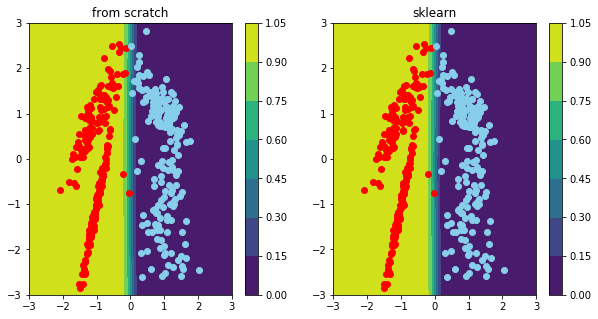

In [71]:
f,ax = plt.subplots(1,2,figsize=(10,5))
c = ax[0].contourf(xgrid, ygrid, yvals_prob.reshape(200,200))
ax[0].scatter(X_test[y_pred==0,0], X_test[y_pred==0,1], color='red')
ax[0].scatter(X_test[y_pred==1,0], X_test[y_pred==1,1], color='skyblue')
ax[0].set(xlim=(-3,3), ylim=(-3,3), title='from scratch')
plt.colorbar(c, ax=ax[0])

c = ax[1].contourf(xgrid, ygrid, yvals_clf_proba.reshape(200,200))
ax[1].scatter(X_test[y_pred_sk==0,0], X_test[y_pred_sk==0,1], label='Class 0', color='red')
ax[1].scatter(X_test[y_pred_sk==1,0], X_test[y_pred_sk==1,1], label='Class 1', color='skyblue')
ax[1].set(xlim=(-3,3), ylim=(-3,3), title='sklearn')
plt.colorbar(c, ax=ax[1])